# Project: Communities and Crime

Let's work with communities data in the United States. Dataset description:

http://archive.ics.uci.edu/ml/datasets/communities+and+crime

Dataset **crimedata** (in .csv format)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('crimedata.csv', na_values=["?"])

# keep only the necessary variables and remove the nans
requiredColumns = [0] + [1] + [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145] + [146]
df.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# data cleanup
data = df[df.columns[requiredColumns]]
data.dropna(how='any')
print(data.shape)

(2215, 92)


In [3]:
data.head()

,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,...,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,...,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02,1394.59
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,...,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56,1955.95
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,...,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59,6167.51
3,Gloversvillecity,NY,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,...,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64,NaN
4,Bemidjicity,MN,11245,2.76,24.46,40.53,28.69,12.65,0,0.0,...,12.9,2,0,1.74,73.75,42.22,60.34,89.02,NaN,9988.79


In [ ]:
# Descriptive statistics
data.describe()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,1994.000000
mean,5.311798e+04,2.707327,14.445837,27.644840,13.975142,11.836393,4.773472e+04,70.465309,33984.696163,78.312758,...,20.990158,13.010203,66.953499,17.823476,7.340302,61.539630,51.538596,77.411079,88.111865,589.078922
std,2.046203e+05,0.334120,4.518623,6.181517,5.970747,4.777565,2.056067e+05,44.080275,13424.680011,7.950672,...,2.987622,1.419679,564.253149,245.452553,8.418476,16.750061,10.517926,10.878186,7.287836,614.784518
min,1.000500e+04,1.600000,4.580000,9.380000,4.640000,1.660000,0.000000e+00,0.000000,8866.000000,31.680000,...,14.000000,10.100000,0.000000,0.000000,0.180000,6.750000,11.830000,27.950000,32.830000,0.000000
25%,1.436600e+04,2.500000,12.250000,24.415000,11.320000,8.750000,0.000000e+00,0.000000,23817.000000,73.400000,...,18.700000,12.000000,0.000000,0.000000,2.060000,50.110000,44.995000,72.060000,85.200000,161.700000
50%,2.279200e+04,2.660000,13.620000,26.780000,12.540000,11.730000,1.804100e+04,100.000000,31441.000000,78.610000,...,21.000000,12.800000,0.000000,0.000000,4.310000,64.490000,52.170000,79.490000,90.030000,374.060000
75%,4.302400e+04,2.850000,15.360000,29.205000,14.345000,14.415000,4.191800e+04,100.000000,41480.500000,84.030000,...,23.100000,13.700000,22.000000,1.000000,9.250000,74.855000,58.740000,85.135000,93.010000,794.400000
max,7.322564e+06,5.280000,54.400000,70.510000,63.620000,52.770000,7.322564e+06,100.000000,123625.000000,96.760000,...,32.700000,23.400000,23383.000000,10447.000000,60.400000,93.140000,78.560000,96.590000,99.900000,4877.060000


In [ ]:
# some values of the target variable are missing,
# take only those objects in which y exists
X = data.loc[data['ViolentCrimesPerPop'].notnull(), :].drop('ViolentCrimesPerPop', axis=1)
y = data['ViolentCrimesPerPop'][X.index]

X.head()

,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,nonViolPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,1394.59
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,1955.95
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,6167.51
3,Gloversvillecity,NY,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,NaN
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,6867.42


In [ ]:
y.head()

0     41.02
1    127.56
2    218.59
3    306.64
5    442.95
Name: ViolentCrimesPerPop, dtype: float64

### 1. Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
import numpy as np

### Let's draw some graphs to look at the data in a general way

In [ ]:
# USA population distribution
fig = px.pie(df, values='population', names='state',
             title='Population of USA', hole=.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

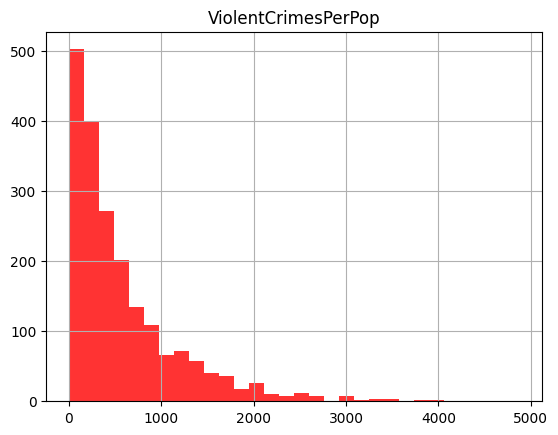

In [ ]:
data.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

<ipython-input-157-63fcbe97b302>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



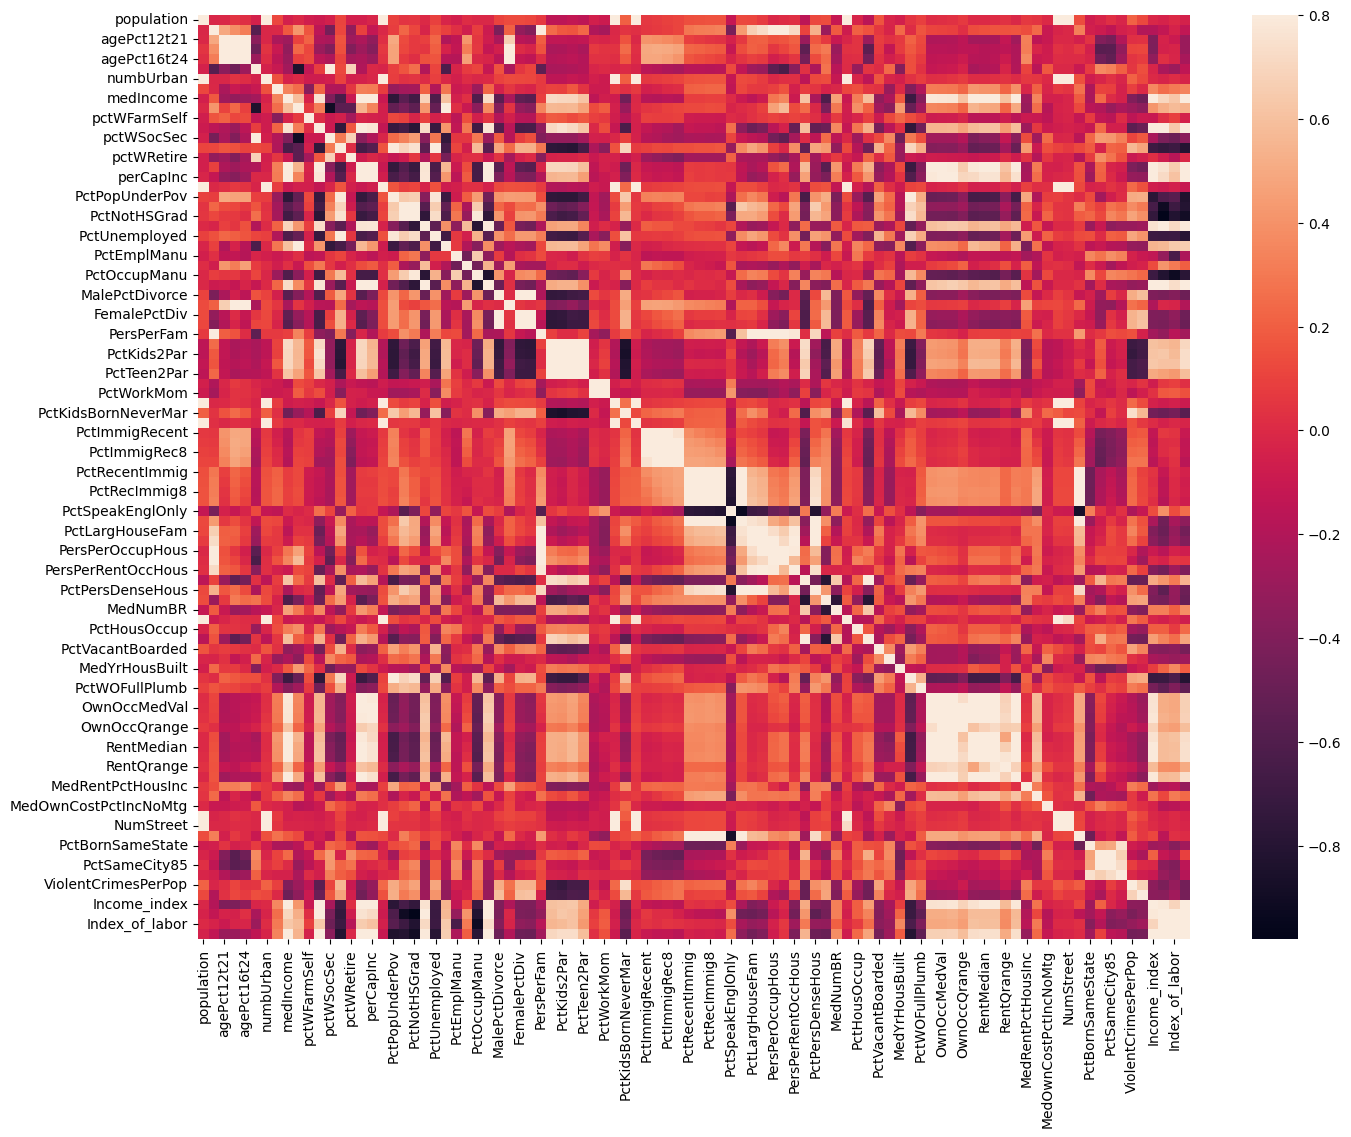

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

# Hypothesis 1 : assume that the percentage of two-parent families is correlated with the number of crimes

## Let's check this by using correlation and identifying significant features using regression

## Looking at variables with correlation with ViolentCrimesPerPop > 0.65:

In [ ]:
def give_corr_features(percent, column):

  columns = []
  for col1, col2 in c1.index:
    if c1[col1,col2] > percent and col1 != col2 and (col1 == column or col2 == column):
      col1, col2 = sorted([col1, col2])
      columns.append([col1, col2, c1[col1, col2]])
  columns = columns[::-1]

  columns_above_percent = []
  for i in columns:
    if i not in columns_above_percent:
      columns_above_percent.append(i)

  return columns_above_percent

In [ ]:
c1 = data.corr().abs().unstack()
c1.sort_values(ascending=True, inplace=True)

list(filter(lambda x: x[2] < 1, give_corr_features(0.5, 'ViolentCrimesPerPop')))

[['PctKidsBornNeverMar', 'ViolentCrimesPerPop', 0.7380890831520146],
 ['PctKids2Par', 'ViolentCrimesPerPop', 0.7280589860875515],
 ['PctFam2Par', 'ViolentCrimesPerPop', 0.6986408740793374],
 ['PctYoungKids2Par', 'ViolentCrimesPerPop', 0.658436366599628],
 ['PctTeen2Par', 'ViolentCrimesPerPop', 0.6556277870933124],
 ['ViolentCrimesPerPop', 'pctWPubAsst', 0.563107115917511],
 ['ViolentCrimesPerPop', 'pctWInvInc', 0.5577865054189147],
 ['FemalePctDiv', 'ViolentCrimesPerPop', 0.5373028014449454],
 ['TotalPctDiv', 'ViolentCrimesPerPop', 0.536548563543747],
 ['MalePctDivorce', 'ViolentCrimesPerPop', 0.5104557564786278],
 ['PctPersOwnOccup', 'ViolentCrimesPerPop', 0.5073295664265562],
 ['PctPopUnderPov', 'ViolentCrimesPerPop', 0.5053492230660874]]

We can see the correlation of the variables of interest with the target variable (1)

### Let's draw graphs with these:

In [ ]:
def draw_scatters(variables, texts):

  traces = []
  for variable in variables:

    trace = go.Scatter(x=y,
                       y=X[variable],
                       name=variable,
                       mode='markers',
                       visible=False, marker=dict(size=8, color=data['perCapInc'], colorscale='hot', showscale=True))
    traces.append(trace)

  traces[0]['visible'] = True

  buttons = []
  for i, variable in enumerate(variables):
      button = dict(method='update',
                    label=variable,
                    args=[{'visible': [i == j for j in range(len(variables))]},  # Set the visibility of traces
                     {'annotations': [{
                            'x': 0.5,
                            'y': 1.15,
                            'xref': 'paper',
                            'yref': 'paper',
                            'text': texts[i],
                            'showarrow': False,
                            'font': {'size': 16}
                        }],
                         'yaxis': {'title': variable}, 'xaxis': {'title': 'number of violent crimes per 100K popuation'}}])
      buttons.append(button)

  return [buttons, traces]

In [ ]:
buttons, traces = draw_scatters(['PctKidsBornNeverMar', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctFam2Par'],
 ['Percentage of kids born out of marriage with per capita income', 'Percentage of kids in family housing with two parents with per capita income',
  'Percent of kids 4 and under in two parent households with per capita income', 'Percent of kids age 12-17 in two parent households with per capita income',
  'percentage of families (with kids) that are headed by two parents with per capita income'])

layout = dict(updatemenus=[dict(active=0, buttons=buttons)])
fig = go.Figure(data=traces, layout=layout)
fig.show()

Trendlines for each of the scatters above (excluding income)

In [ ]:
# import dash_core_components as dcc

def get_trendlines(cols):

  figures = []

  for i in range(5):
    figures.append(px.scatter(data, x='ViolentCrimesPerPop', y=cols[i],
                  trendline="ols", title=cols[i], trendline_color_override='red'))

  # For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
  # This is essentially breaking down the Express fig into it's traces
  figure_traces = [[], [], [], [], []]
  for i in range(5):

    for trace in range(len(figures[i]["data"])):
        figure_traces[i].append(figures[i]["data"][trace])

  #Create a 1x2 subplot
  this_figure = sp.make_subplots(rows=2, cols=3)

  # Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot

  def add_traces(i: int, j: int, n: int):
    for traces in figure_traces[n]:
      this_figure.append_trace(traces, row=i, col=j)

  add_traces(1, 1, 0)
  add_traces(1, 2, 1)
  add_traces(1, 3, 2)
  add_traces(2, 1, 3)
  add_traces(2, 2, 4)

  return this_figure

In [ ]:
cols = ['PctKidsBornNeverMar', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctFam2Par']
get_trendlines(cols)

The graphs show a positive correlation between all features related to having two parents in the family and total number of violent crimes. The trendline is pointing upward rapidly.

In [ ]:
buttons, traces = draw_scatters(['MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv'],
 ['percentage of males who are divorced with per capita income', 'percentage of males who have never married with per capita income',
  'percentage of females who are divorced with per capita income', 'percentage of population who are divorced with per capita income'])

layout = dict(updatemenus=[dict(active=0, buttons=buttons)])
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
cols = ['MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv']
get_trendlines(cols)

A similar conclusion can be obtained with all divorce data

### Regression. Step 1.

* Train a Simple linear regression on the training sample (sklearn.linear_model.LinearRegression)

* Predict values for X_train, X_test. Calculate metrics r2_score and MSE for these.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
def print_metrics(yt, yp, what=''):
    r2 = r2_score(yt, yp)
    mse = mean_squared_error(yt, yp)
    print(f"{what}: r2 = {r2}, mse = {mse}")

In [ ]:
lm=LinearRegression()
lm.fit(X_train, y_train)

y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

print_metrics(y_train, y_pred_train, "Train")
print_metrics(y_test, y_pred_test, "Test")

Train: r2 = 0.6731208442568581, mse = 119935.90613769476
Test: r2 = 0.49554452282478767, mse = 206978.88436767244


### Regularization. Step 2

* Train Ridge-regression (sklearn.linear_model.Ridge) on train set with alpha = 5.

* Predict values and calculate metrics r2_score and mse.

* Has the score changed ? How ?

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rm = Ridge(alpha=5)
rm.fit(X_train, y_train)

ridge_test = rm.predict(X_test)
ridge_train = rm.predict(X_train)

print_metrics(y_train, ridge_train, "Train")
print_metrics(y_test, ridge_test, "Test")

Train: r2 = 0.6719934783602841, mse = 120349.55028715714
Test: r2 = 0.49559487703653626, mse = 206958.22395452892


Score almost has not changed

### Scaler. Step 3.

* Scale the X_train using sklearn.
* Check whether the score of Ridge and simple regression changed after scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train_scaled = pd.DataFrame(data=sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=sc.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
obj = MinMaxScaler()
obj.fit_transform(data)
scale = obj.fit_transform(data)
print(scale)

rm = Ridge(alpha=5)
rm.fit(X_train_scaled, y_train)

ridge_test = rm.predict(X_test_scaled)
ridge_train = rm.predict(X_train)

print()
print_metrics(y_train, ridge_train, "Train")
print_metrics(y_test, ridge_test, "Test")

[[2.70083291e-04 4.07608696e-01 1.58370132e-01 ... 7.30477855e-01
  8.39570598e-01 8.41080487e-03]
 [1.79390006e-03 3.31521739e-01 1.29064633e-01 ... 9.07196970e-01
  9.43640972e-01 2.61551016e-02]
 [2.64462823e-03 2.25543478e-01 1.36089924e-01 ... 4.85285548e-01
  7.45787983e-01 4.48200350e-02]
 ...
 [3.12052183e-03 2.33695652e-01 1.45122441e-01 ... 6.93327506e-01
  8.86685552e-01 7.25498559e-02]
 [4.84372160e-04 3.50543478e-01 2.52509033e-01 ... 7.54224942e-01
  9.12926793e-01 1.41718576e-01]
 [2.58363727e-03 2.74456522e-01 1.68807708e-01 ... 5.57255245e-01
  8.38676010e-01 1.88410641e-01]]

Train: r2 = -3201622269.910152, mse = 1174713839734608.2
Test: r2 = 0.5832228903453367, mse = 171004.310765652


### Feature selection. Step 4.

* Let's check whether we need variables with small variance ?
To do this, let's estimate the score if we remove from the sample the variables with variance less than 0.01

For this purpose there is a class sklearn.feature_selection.VarianceThreshold.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# remove all variables with variance less than < 0.01

vs_transformer = VarianceThreshold(0.01)

X_train_var = pd.DataFrame(data=vs_transformer.fit_transform(X_train_scaled),
                           columns=X_train_scaled.columns[vs_transformer.get_support()])
X_test_var = pd.DataFrame(data=vs_transformer.transform(X_test_scaled),
                          columns=X_test_scaled.columns[vs_transformer.get_support()])

In [ ]:
vs_transformer

VarianceThreshold(threshold=0.01)

In [ ]:
rm = Ridge(alpha=5)
rm.fit(X_train_var, y_train)

y_pred_test_var = rm.predict(X_test_var)
y_pred_train_var = rm.predict(X_train_var)

print_metrics(y_train, y_pred_train_var, "Train")
print_metrics(y_test, y_pred_test_var, "Test")

Train: r2 = 0.6288299135035398, mse = 136186.78301451617
Test: r2 = 0.6294281587599264, mse = 152046.21566890882


### Lasso as a way of finding good features. Step 5.

* Train Lasso and find the most significant variables in terms of this regression model.

* Show what variables are gone, try different alpha to remove more coefﬁcients.

* Compare the score

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

In [ ]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

lasso_test = lm.predict(X_test)
lasso_train = lm.predict(X_train)

print_metrics(y_train, lasso_train, "Train")
print_metrics(y_test, lasso_test, "Test")

Train: r2 = 0.6727353497987001, mse = 120077.34870549977
Test: r2 = 0.4952877538603341, mse = 207084.2370820496


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.976e+07, tolerance: 5.485e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lm.coef_[:20]

array([ 7.88528636e-04, -5.72299707e+01,  1.12409777e+01, -3.18831334e+01,
        1.16969293e+00, -1.58278582e+01, -1.62390254e-03,  1.38796423e+00,
       -1.30523648e-02, -9.08256403e+00,  2.32564030e+01, -5.54842619e+00,
        8.51972714e+00, -3.02017184e-01, -7.08451994e+00,  9.16274650e-03,
        3.76305888e-03,  4.97170202e-03, -4.83138715e+00, -1.61632879e+01])

In [ ]:
lasso_coefs = pd.DataFrame(np.array([X_train.columns, lm.coef_]).T, columns=['feature', 'weight'])

vals = lasso_coefs[lasso_coefs['weight'] > 0]
vals.sort_values(by="weight", ascending=False)

,feature,weight
54,PersPerOccupHous,839.87533
60,MedNumBR,66.452219
28,MalePctDivorce,58.229746
48,PctRecImmig8,43.761153
40,PctKidsBornNeverMar,41.879481
52,PctLargHouseFam,27.89363
58,PctPersDenseHous,27.709946
10,pctWFarmSelf,23.256403
30,FemalePctDiv,21.0224
63,PctHousOwnOcc,20.645384


* In summary, using these models for feature selection, correlation table and graphs, we can judge that the stated hypothesis was confirmed

# Hypothesis 2 : The number of violent crimes depends on the overall wealth of the population

# Let's calculate these index and add it as a separate column

We will include in this index:
1. Per capita Income - total community income divided by total population. To make the data suitable for inclusion in the index, the per capita income values must be converted to income scores ranging from 0 to 1. A formula was used for this purpose:

$$
x_1 = \frac{log(perCapInc) - log(2000)}{log(40000) - log(2000)}
$$

The theoretical minimum and maximum (2000 and 4000 dollars respectively) were derived from the actual range of per capita incomes in Canadian communities. To account for the diminishing marginal utility of income, a logarithmic function was included in the income component. According to this principle, people in lower income positions benefit more from additional income than those at higher income levels.
2. Level of Education:
$$
x_2 = \frac{3}{8}PctLess9thGrade + \frac{3}{8}PctNotHSGrad + \frac{2}{8}PctBSorMore
$$
3. Percentage of Divorces
$$
x_3 = TotalPctDiv
$$
4. The labor force employment index of the population, defined by:
- labor force participation rate (percentage of people 16 and over, in the labor force, and unemployed)
- level of total employment (percentage of people 16 and over who are employed )

$$
x_4 = \frac{3}{10}(1 - PctUnemployed) + \frac{2}{10}PctEmploy + \frac{3}{10}(1 - PctOccupManu) + \frac{2}{10}(1 - PctEmplManu)
$$
5. Percentage of people under the poverty level
$$
x_5 = PctPopUnderPov
$$

6. Final index formula:
$$
wealth_Index = \frac{3}{11}Income + \frac{3}{11}Education + \frac{1}{11} * (1 - Divorces) + \frac{2}{11} * Labour + \frac{2}{11} * Poverty
$$
$$
= frac{3}{11}x_1 + \frac{3}{11}x_2 + \frac{1}{11} (1 - x_3) + \frac{2}{11} x_4 + \frac{2}{11} (1 - x_5)
$$

In [ ]:
from math import log2

In [ ]:
# used columns in index calculation
X[['perCapInc', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'TotalPctDiv', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'PctPopUnderPov', 'Income_index', 'Level_of_education', 'Index_of_labor', 'Wealth_index']].head(10)

,perCapInc,PctLess9thGrade,PctNotHSGrad,PctBSorMore,TotalPctDiv,PctUnemployed,PctEmploy,PctEmplManu,PctOccupManu,PctPopUnderPov,Income_index,Level_of_education,Index_of_labor,Wealth_index
0,29711,5.81,9.90,48.18,4.47,2.70,64.55,14.65,5.49,1.96,0.900738,0.811538,0.87523,0.891217
1,20148,5.61,13.72,29.89,5.42,2.43,61.96,12.26,6.39,3.98,0.771083,0.752238,0.87294,0.834731
2,16946,2.80,9.09,30.13,12.55,4.01,69.80,15.95,8.79,4.75,0.713310,0.780737,0.86930,0.818204
3,10810,11.05,33.68,10.81,12.91,9.86,54.74,31.22,26.76,17.23,0.563243,0.609287,0.73718,0.683477
5,11878,8.76,23.03,20.66,13.04,5.72,59.02,14.31,14.72,17.78,0.594693,0.682438,0.82810,0.727417
6,18193,4.49,13.89,27.01,7.64,4.85,65.42,14.02,8.50,4.01,0.737012,0.748600,0.86275,0.820521
7,12161,10.09,28.67,12.00,14.94,8.19,56.59,27.00,21.92,17.98,0.602553,0.634650,0.76885,0.703664
8,13554,5.52,11.27,30.24,8.64,4.18,68.51,6.89,11.37,13.68,0.638754,0.762637,0.87659,0.781578
9,10195,13.01,31.62,17.02,12.97,8.39,51.37,15.73,16.43,28.68,0.543690,0.625188,0.79682,0.672452
10,12929,9.07,24.86,19.23,13.53,7.19,57.76,25.33,15.74,15.61,0.622995,0.670837,0.79607,0.729649


## Data transformation

In [ ]:
# step 1
X['Income_index'] = X.apply(lambda row: (log2(row.perCapInc) - log2(2000)) / (log2(40000) - log2(2000)), axis=1)

In [ ]:
# step 2
X['Level_of_education'] = X.apply(lambda row: (3 * (1 - row.PctLess9thGrade / 100) / 8 + 3 * (1 - row.PctNotHSGrad / 100) / 8 + 2 * row.PctBSorMore / 800), axis=1)

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Level of education", "Income index"))

fig.add_trace(go.Histogram(x=X['Level_of_education'], name='level of education'), row=1, col=1, secondary_y=False)

fig.add_trace(go.Histogram(x=X['Income_index'], name='income index'), row=1, col=2, secondary_y=False)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=X['Income_index'], name='income index'))
fig.add_trace(go.Histogram(x=X['Level_of_education'], name='level of education'))

fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

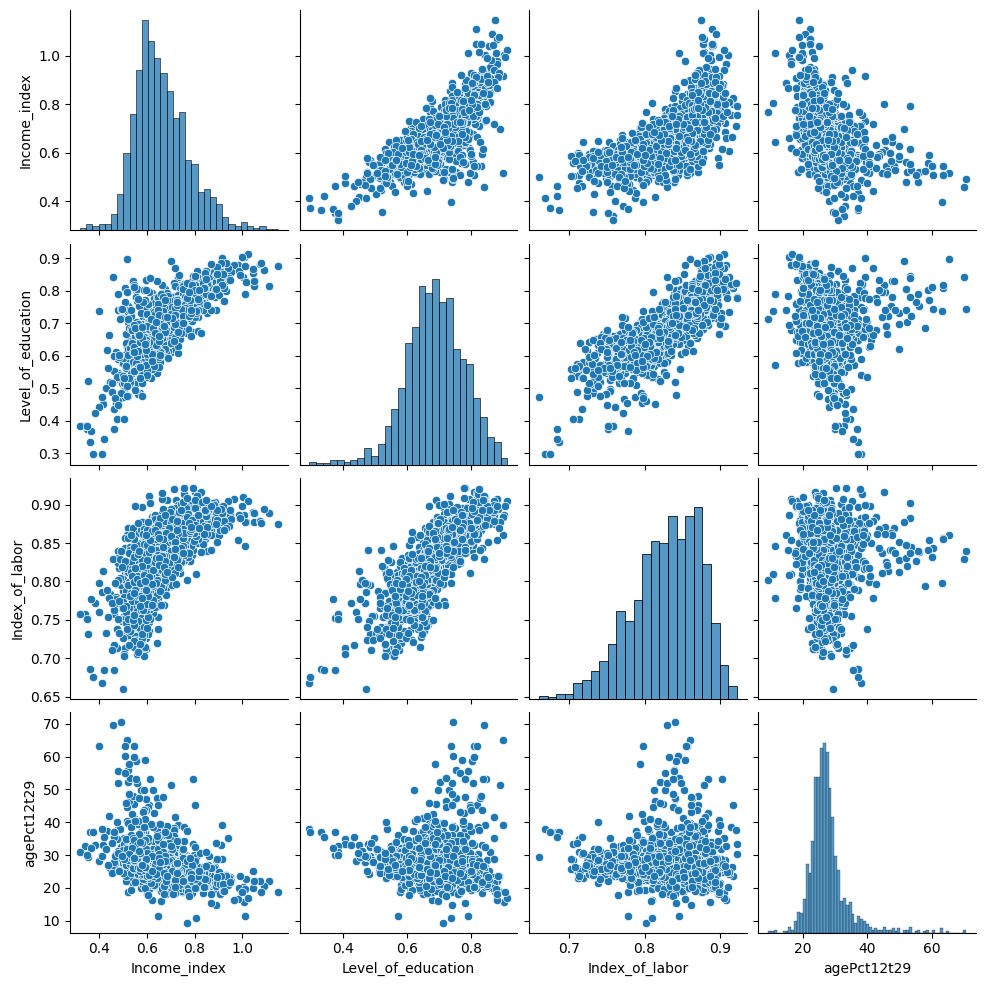

In [ ]:
sns.pairplot(X[['Income_index', 'Level_of_education', 'Index_of_labor', 'agePct12t29']])

In [ ]:
# step 4
X['Index_of_labor'] = X.apply(lambda row: (3 * (1 - row.PctUnemployed / 100) / 10 + 3 * (1 - row.PctOccupManu / 100) / 10 + 2 * row.PctEmploy / 1000 + 2 * (1 - row.PctEmplManu / 100) / 10), axis=1)

In [ ]:
# step 6
X['Wealth_index'] = X.apply(lambda row: (3 * (row.Income_index) / 11 + 3 * (row.Level_of_education) / 11 + (1 - row.TotalPctDiv / 100) / 11 + 2 * (row.Index_of_labor) / 11 + 2 * (1 - row.PctPopUnderPov / 100) / 11), axis=1)

In [ ]:
# duplication of code for adding new columns to a dataset without separating data by target variable (X and y)
data['Income_index'] = data.apply(lambda row: (log2(row.perCapInc) - log2(2000)) / (log2(40000) - log2(2000)), axis=1)
data['Level_of_education'] = data.apply(lambda row: (3 * (1 - row.PctLess9thGrade / 100) / 8 + 3 * (1 - row.PctNotHSGrad / 100) / 8 + 2 * row.PctBSorMore / 800), axis=1)
data['Index_of_labor'] = data.apply(lambda row: (3 * (1 - row.PctUnemployed / 100) / 10 + 3 * (1 - row.PctOccupManu / 100) / 10 + 2 * row.PctEmploy / 1000 + 2 * (1 - row.PctEmplManu / 100) / 10), axis=1)
data['Wealth_index'] = data.apply(lambda row: round((3 * (row.Income_index) / 11 + 3 * (row.Level_of_education) / 11 + (1 - row.TotalPctDiv / 100) / 11 + 2 * (row.Index_of_labor) / 11 + 2 * (1 - row.PctPopUnderPov / 100) / 11), 2), axis=1)

<ipython-input-12-06b9ad8c0dad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income_index'] = data.apply(lambda row: (log2(row.perCapInc) - log2(2000)) / (log2(40000) - log2(2000)), axis=1)
<ipython-input-12-06b9ad8c0dad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Level_of_education'] = data.apply(lambda row: (3 * (1 - row.PctLess9thGrade / 100) / 8 + 3 * (1 - row.PctNotHSGrad / 100) / 8 + 2 * row.PctBSorMore / 800), axis=1)
<ipython-input-12-06b9ad8c0dad>:3: SettingWithCopyWarning: 
A

In [ ]:
# Final graph of the relations between the wealth index and the number of violent crimes
fig = px.scatter(data, x='Wealth_index', y='ViolentCrimesPerPop', trendline="ols", trendline_options=dict(log_x=True), color='population')
fig.show()

The graph shows that as Wealth_index increases, there is a decrease in Violent Crimes.

Conclusion - settlements with a high standard of living most commonly have minimal crime rates.

In [ ]:
fig = px.sunburst(data,
                  path=["state", "Wealth_index"],
                  values="ViolentCrimesPerPop",
                  color='state',
                  width=1000,
                  height=800,
                 )
fig.show()

In [ ]:
# Age distribution in the context of non-violent crimes
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['agePct12t21'], y=data['nonViolPerPop'], name='Age%12-21', mode='markers'))
fig.add_trace(go.Scatter(x=data['agePct12t29'], y=data['nonViolPerPop'], name='Age%12-29', mode='markers'))
fig.add_trace(go.Scatter(x=data['agePct16t24'], y=data['nonViolPerPop'], name='Age%16-24', mode='markers'))
fig.add_trace(go.Scatter(x=data['agePct65up'], y=data['nonViolPerPop'], name='Age%65up', mode='markers'))

fig.update_layout(barmode='overlay')
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Non Violent Crimes by all age%",
                  xaxis_title="age%",
                  yaxis_title="Non Violent crimes per pop",
                  margin=dict(l=0, r=0, t=30, b=0))

fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
# Age distribution in the context of violent crimes
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['agePct12t21'], y=data['ViolentCrimesPerPop'], name='Age%12-21', mode='markers'))
fig.add_trace(go.Scatter(x=data['agePct12t29'], y=data['ViolentCrimesPerPop'], name='Age%12-29', mode='markers'))
fig.add_trace(go.Scatter(x=data['agePct16t24'], y=data['ViolentCrimesPerPop'], name='Age%16-24', mode='markers'))
fig.add_trace(go.Scatter(x=data['agePct65up'], y=data['ViolentCrimesPerPop'], name='Age%65up', mode='markers'))

fig.update_layout(barmode='overlay')
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Violent Crimes by all age%",
                  xaxis_title="age%",
                  yaxis_title="Violent crimes per pop",
                  margin=dict(l=0, r=0, t=30, b=0))

fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
from plotly.offline import iplot, init_notebook_mode

In [ ]:
# Aggregate view of Crimes by State
crimedata_state = data.groupby('state').agg({'ViolentCrimesPerPop':'mean',
                                             'nonViolPerPop':'mean'})[['ViolentCrimesPerPop',
                                                                       'nonViolPerPop']].reset_index()
data1 = dict(type='choropleth',
        colorscale = 'Viridis',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'non-Violent Crimes(Per-100K-Pop)'}
        )
layout1 = dict(
        title = 'Aggregate view of non-Violent Crimes Per 100K Population',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )

fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)

data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "Earth",
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype('float'),
        colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        title = 'Aggregate view of Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )

fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)

In [ ]:
# Aggregate view of Wealth-index by State
crimedata_state = data.groupby('state').agg({'Wealth_index':'mean'})[['Wealth_index']].reset_index()

data1 = dict(type='choropleth',
        colorscale = 'Viridis',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['Wealth_index'].astype(float),
        colorbar = {'title':'Wealth_index'}
        )
layout1 = dict(
        title = 'Aggregate view of Wealth_index',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )

fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)

By mapping the data, we can compare the index values with reality, and realize that the index has been competently calculated.

# Overall


Let us summarize the results of the work done. So, we looked at the dataset in general, found that both of our hypotheses were confirmed, and learned additional features using various regression models, which allowed us to learn more information about what correlates with the number of violent and nonviolent crimes.